In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 02 11:45:00 2024

@author: jvieira
"""

'\nCreated on Tue Sep 02 11:45:00 2024\n\n@author: jvieira\n'

In [2]:
############Import use packages##########
from astropy.io import fits

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
#plt.style.use('dark_background')

import numpy as np
import pandas as pd

import glob

In [3]:
############Def Functions######################
def read_data(file): #####Function to read the fits files and return: Data, Header, Time and Frequencies###################
    with fits.open(file) as hdu:
        data=hdu[0].data #cut lower channels data[:-10,:]  later
        hdr=hdu[0].header
        tempo=hdu[1].data[0][0].astype(np.float32)
        f0   = hdu[1].data[0][1].astype(np.float32)       
    return data, hdr, tempo, f0

def day_mask(day, files):#########create a mask for one day in form 'YYYYMMDD' (Year, Month and Day in string type) and append it in a variable############
    return [x for x in files if day in x]

def plot_day(day,month,year,data, n, V_max):########Plot all day information####### Works only in day with 96 .fit files### n=number of bits and V_max = max voltage in millivolts(mV) in ADC.
    #files_ = read_data(data)
    if (day <= 9 and month<= 9):
        day_ = ''+str(year)+'0'+str(month)+'0'+str(day)+''
    elif (day <= 9):
        day_ = ''+str(year)+''+str(month)+'0'+str(day)+''
    elif (month <= 9):
        day_ = ''+str(year)+'0'+str(month)+''+str(day)+''
    else:
        day_ = ''+str(year)+''+str(month)+''+str(day)+''
    print(day_)
    day = day_mask(day_, data)
    max = len(day)-1
    #print(max)
    r, c = 12,8
    teste = read_data(day[0])
    fig,ax=plt.subplots(r,c,figsize=(50,32),sharey=True)
    fig.suptitle('Uirapuru with Callisto: {}'.format(teste[1]['DATE-OBS']),fontsize=25)
    fig.supxlabel('Time (s)', fontsize=25)
    fig.supylabel('Frequency (Hz)', fontsize=25)
    for i in range(r):
        for j in range(c):
            data_=(read_data(day[c*i+j])[0]/((2**n)-1)*(V_max/25.4))
            data__=read_data(day[c*i+j])
            im = ax[i,j].imshow(data_[:-10,:],aspect='auto',extent=[teste[2].min(),teste[2].max(),teste[3].min(),teste[3].max()])
            #plt.title('Time: {} to {}'.format(data__[1]['TIME-OBS'], data__[1]['TIME-END']))
    print('time 0-0 = {}, time 11-7 = {}'.format(read_data(day[0])[1]['TIME-OBS'], read_data(day[max])[1]['TIME-OBS']))
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax, label='V')

def plot_15min(data_, n, V_max):###n=number of bits and V_max = max voltage in ADC.
    data = data_[0]
    plt.figure(figsize=(15,5))
    plt.imshow(((data/((2**n)-1))*(V_max/25.4)),aspect='auto', extent=[data_[2].min(),data_[2].max(),data_[3].min(),data_[3].max()])
    plt.title('Uirapuru with Callisto: {} from {} to {}'.format(data_[1]['DATE-OBS'], data_[1]['TIME-OBS'], data_[1]['TIME-END']),fontsize=15)
    plt.xlabel('Time (s)',fontsize=15)
    plt.ylabel('Frequency (Hz)',fontsize=15)
    plt.colorbar(label='V');

In [4]:
file=sorted(glob.glob('FITS_UIRAPURU-20240828T174944Z-001/FITS_UIRAPURU/*.fit')) #Choose the location where the Uirapuru data is save on your computer!

In [5]:
data_test = read_data(file[3])

In [6]:
data_test[0]#If you choose the numbers from 0 to 3 you see: 0=data, 1=header, 2=time vector, 3=frequency vector.

array([[208, 207, 209, ..., 209, 207, 208],
       [209, 208, 209, ..., 208, 207, 208],
       [208, 208, 209, ..., 208, 208, 208],
       ...,
       [215, 214, 214, ..., 215, 215, 214],
       [213, 212, 212, ..., 213, 214, 213],
       [209, 209, 208, ..., 209, 209, 209]], dtype=uint8)

In [8]:
day = day_mask('20240624', file) ## choose a day in form 'YYYYMMDD' (Year, Month and Day in string type)

In [152]:
len(day) #number of fits in day mask vector

96

20240624
time 0-0 = 00:11:36.550, time 11-7 = 23:56:37.975


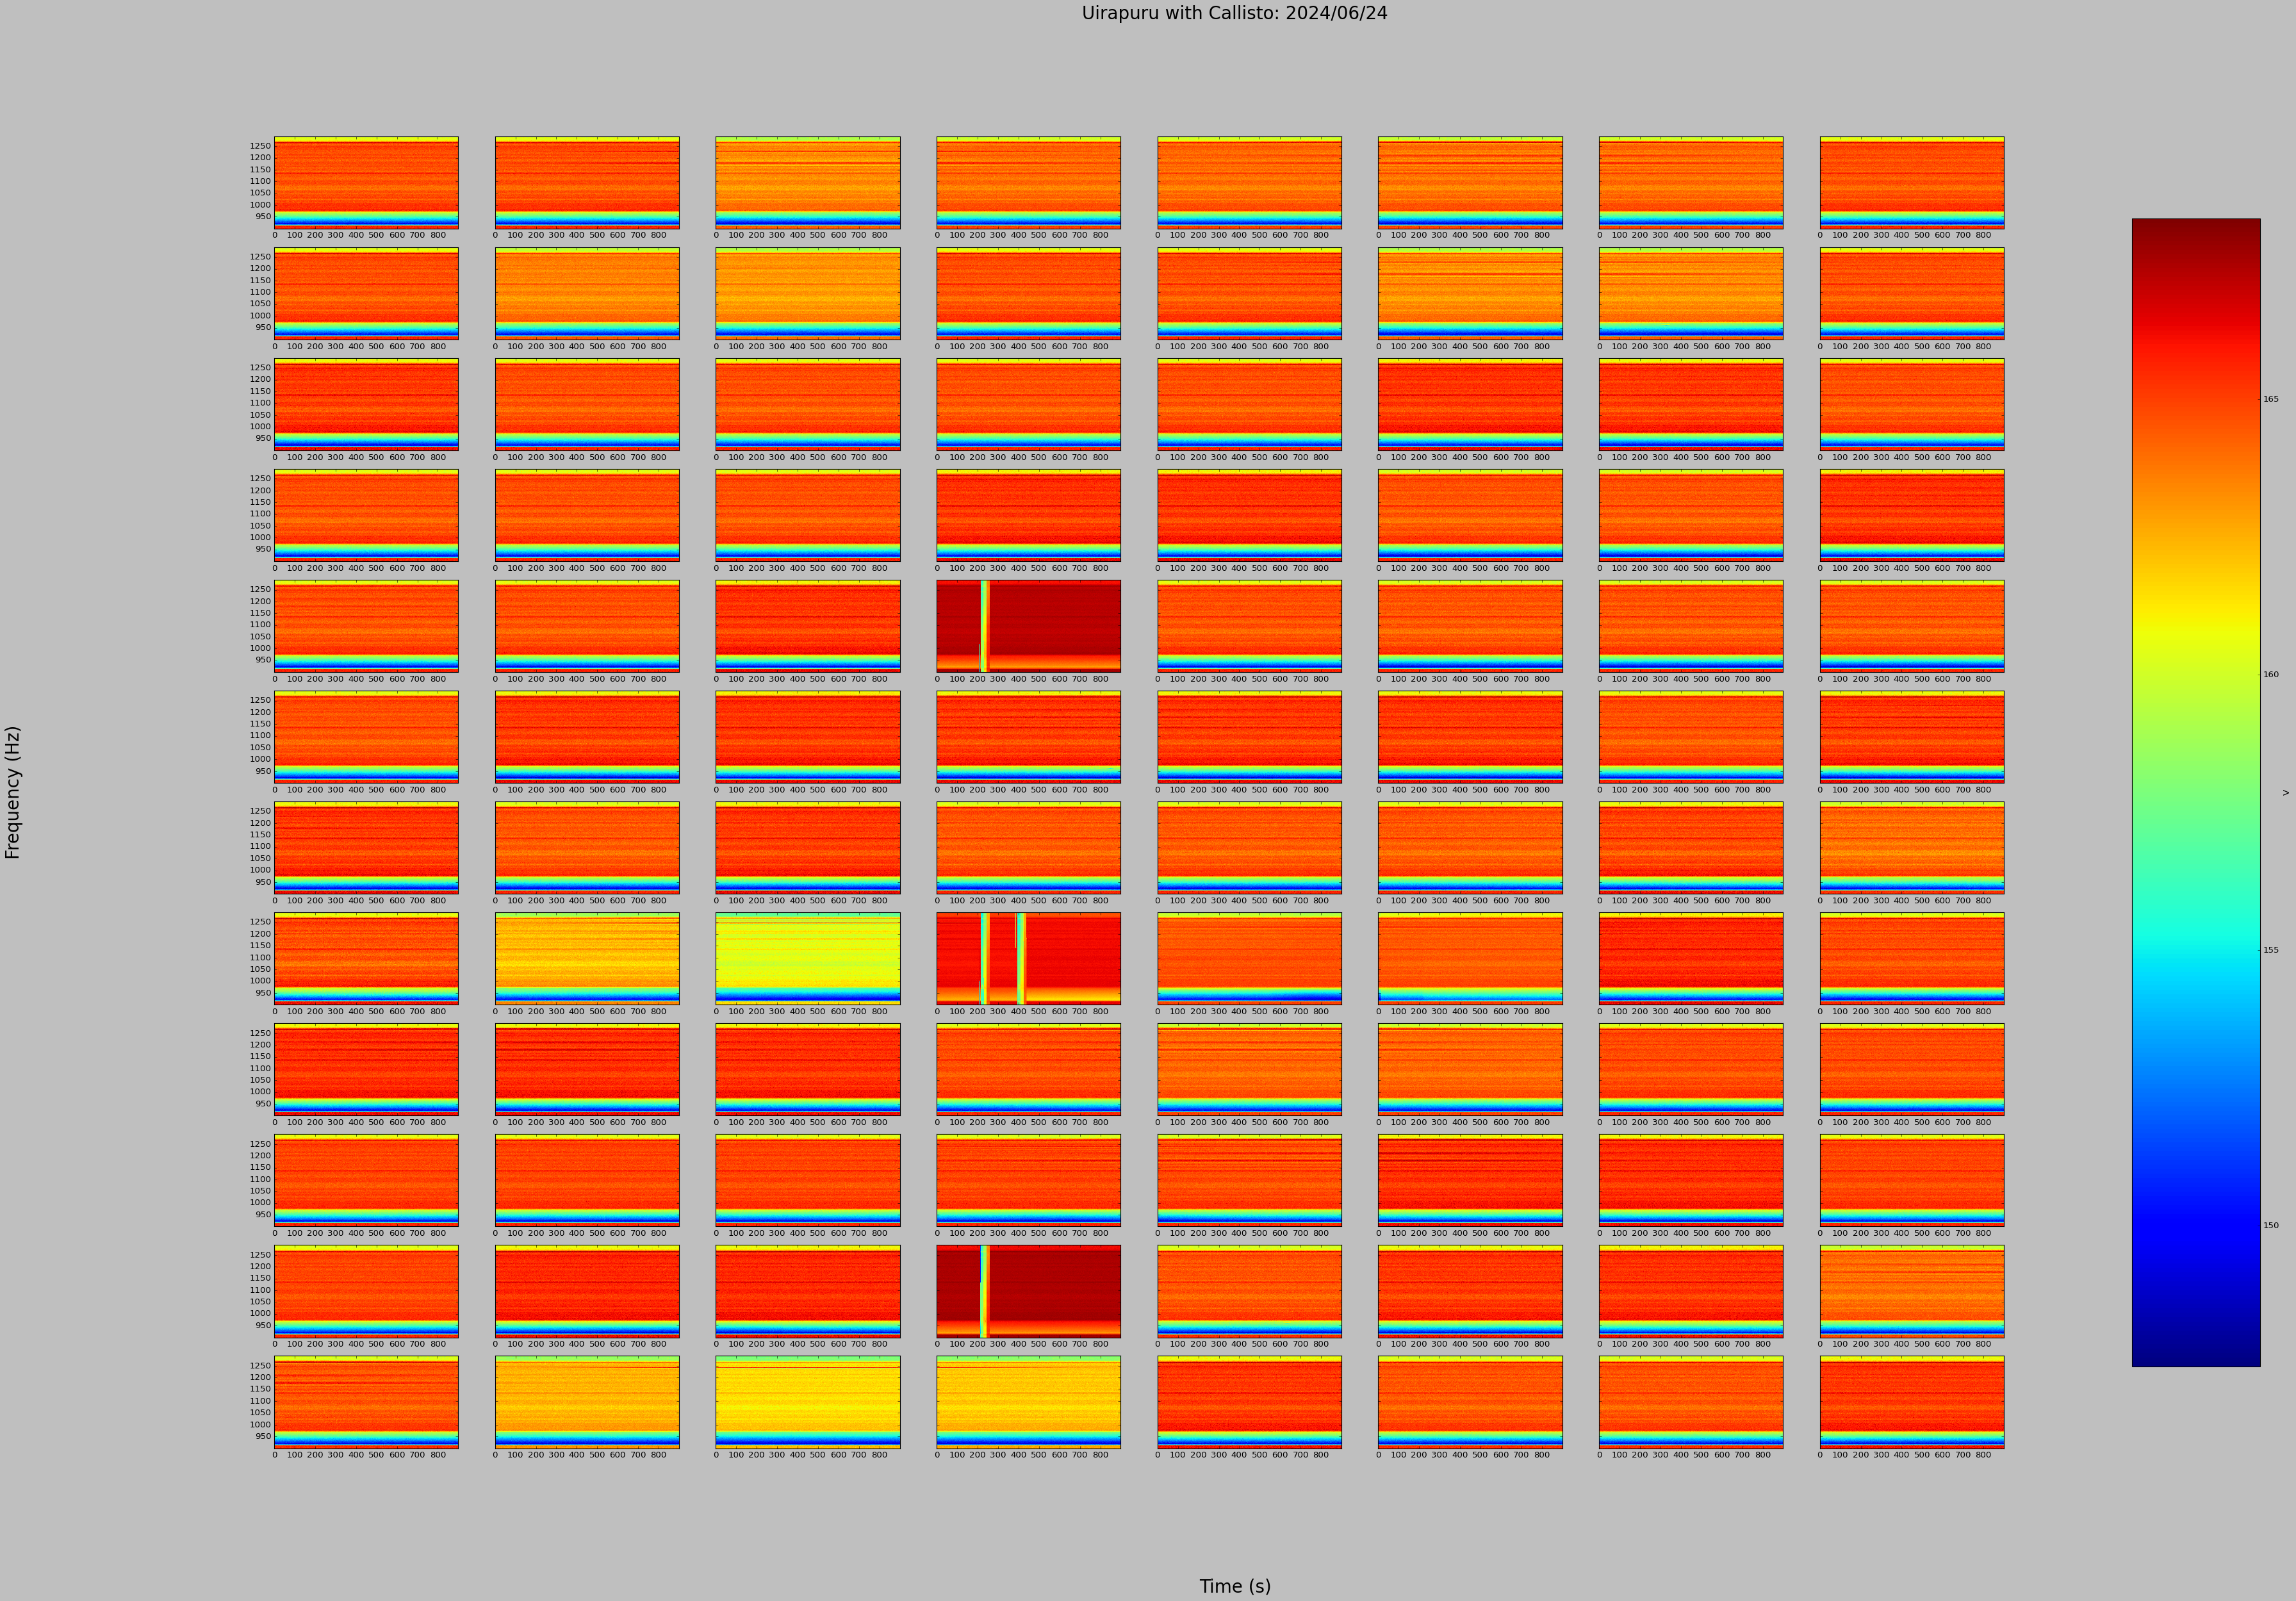

In [153]:
day3 = plot_day(day=24,month=6,year=2024, data=file, n=8, V_max=5000)#Plot all the information in day 3 20240622 of observation

1042.38 982.255 60.125


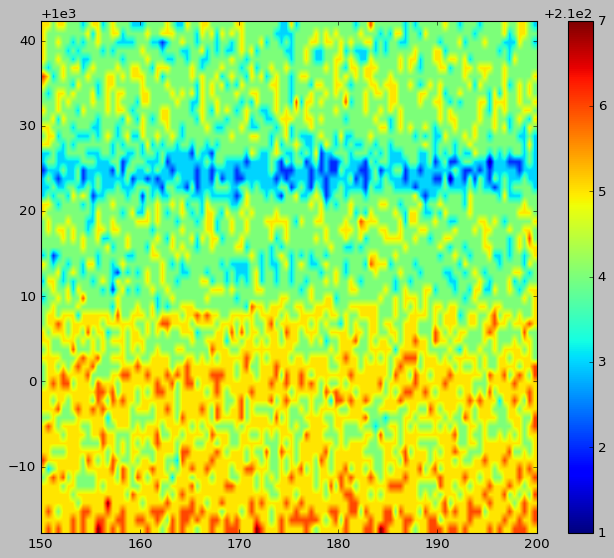

In [163]:
data = read_data(day[59]) #Read data file
data1 = data[0][:-10]
plt.figure(figsize=(10,8))
#plt.imshow(data1[:,430:516])
#plt.imshow(data1)
#print(data[2][200])
print(data[3][250] ,data[3][310] ,data[3][250]-data[3][310])
plt.imshow(data1[250:310,300:400],aspect='auto', extent=[data[2][300],data[2][400],data[3][310],data[3][250]])
#plt.imshow(data1[30:310,432:518],aspect='auto', extent=[data[2][432],data[2][520],data[3][310],data[3][30]])
plt.colorbar()
#data1[,220:250].shape
#plot_15min(data, n=8, V_max=5000) #choose the data entry (0) on data file to generate a plot.


1262.692 982.255 280.437


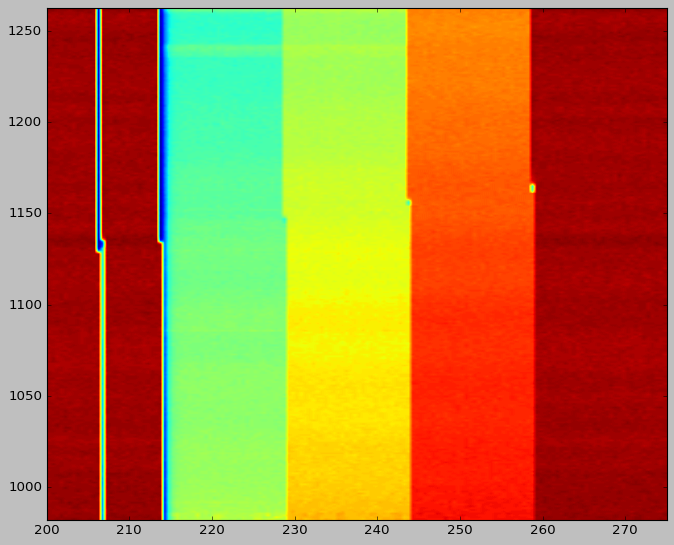

In [10]:
data = read_data(day[83]) #Read data file
data1 = data[0][:-10]
plt.figure(figsize=(10,8))
#plt.imshow(data1[:,430:516])
#plt.imshow(data1)
#print(data[2][200])
print(data[3][30] ,data[3][310] ,data[3][30]-data[3][310])
plt.imshow(data1[30:310,400:550],aspect='auto', extent=[data[2][400],data[2][550],data[3][310],data[3][30]])

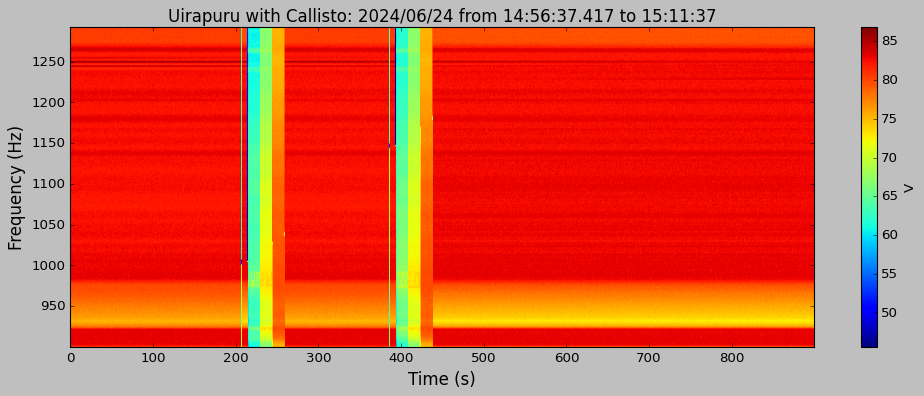

In [144]:
plot_15min(data, 8, 2500)

In [164]:
data_ = [read_data(day[i])[0][:-10] for i in range(len(day)) ]
data = np.concatenate(data_, axis=1)
print(data.shape)
Y_ssdB=(((data)/((2**8)))*(2500/25.4))
#Y_csdB=(((median-min)/((2**8)))*(2500/25.4))
Y_ssW = 10**(Y_ssdB/10)
#Y_csW = 10**(Y_csdB/10)

(390, 172800)


In [165]:
Y_ssdB, Y_ssW

(array([[80.35494587, 80.35494587, 79.97047244, ..., 80.35494587,
         79.97047244, 79.97047244],
        [80.35494587, 80.35494587, 80.35494587, ..., 79.97047244,
         79.97047244, 80.35494587],
        [80.35494587, 80.35494587, 79.97047244, ..., 79.97047244,
         79.97047244, 79.97047244],
        ...,
        [82.66178642, 82.66178642, 82.66178642, ..., 82.66178642,
         82.66178642, 83.04625984],
        [82.66178642, 82.66178642, 82.66178642, ..., 82.66178642,
         82.66178642, 82.66178642],
        [82.66178642, 82.66178642, 83.04625984, ..., 83.04625984,
         82.66178642, 83.04625984]]),
 array([[1.08516202e+08, 1.08516202e+08, 9.93224089e+07, ...,
         1.08516202e+08, 9.93224089e+07, 9.93224089e+07],
        [1.08516202e+08, 1.08516202e+08, 1.08516202e+08, ...,
         9.93224089e+07, 9.93224089e+07, 1.08516202e+08],
        [1.08516202e+08, 1.08516202e+08, 9.93224089e+07, ...,
         9.93224089e+07, 9.93224089e+07, 9.93224089e+07],
        ...,


In [166]:
data_mean=np.mean(data,axis=1)
data_max=np.max(data,axis=1)
data_min=np.min(data,axis=1)
data_std=np.std(data,axis=1)

(390,)

In [11]:
data_m = np.array(data_min)
data_mx = np.array(data_max)
data_median = np.array(data_mean)

In [12]:
min = np.ones((390,172800))
max = np.ones((390,172800))
median = np.ones((390,172800))
for i in range (0,172800):
    min[:,i] = min[:,i]*data_m
    max[:,i] = max[:,i]*data_mx
    median[:,i] = median[:,i]*data_median
print(min, max, median)

[[122. 122. 122. ... 122. 122. 122.]
 [121. 121. 121. ... 121. 121. 121.]
 [121. 121. 121. ... 121. 121. 121.]
 ...
 [125. 125. 125. ... 125. 125. 125.]
 [124. 124. 124. ... 124. 124. 124.]
 [124. 124. 124. ... 124. 124. 124.]] [[212. 212. 212. ... 212. 212. 212.]
 [212. 212. 212. ... 212. 212. 212.]
 [212. 212. 212. ... 212. 212. 212.]
 ...
 [217. 217. 217. ... 217. 217. 217.]
 [218. 218. 218. ... 218. 218. 218.]
 [217. 217. 217. ... 217. 217. 217.]] [[208. 208. 208. ... 208. 208. 208.]
 [208. 208. 208. ... 208. 208. 208.]
 [208. 208. 208. ... 208. 208. 208.]
 ...
 [215. 215. 215. ... 215. 215. 215.]
 [215. 215. 215. ... 215. 215. 215.]
 [215. 215. 215. ... 215. 215. 215.]]


In [15]:
NF = (14.66 - 10*np.log10(Y_csW-1))

In [16]:
NF

array([[-18.4025696 , -18.4025696 , -18.4025696 , ..., -18.4025696 ,
        -18.4025696 , -18.4025696 ],
       [-18.7872248 , -18.7872248 , -18.7872248 , ..., -18.7872248 ,
        -18.7872248 , -18.7872248 ],
       [-18.7872248 , -18.7872248 , -18.7872248 , ..., -18.7872248 ,
        -18.7872248 , -18.7872248 ],
       ...,
       [-19.94110305, -19.94110305, -19.94110305, ..., -19.94110305,
        -19.94110305, -19.94110305],
       [-20.32570402, -20.32570402, -20.32570402, ..., -20.32570402,
        -20.32570402, -20.32570402],
       [-20.32570402, -20.32570402, -20.32570402, ..., -20.32570402,
        -20.32570402, -20.32570402]])

In [17]:
NF_m = np.median(NF)

In [18]:
NF_m

-21.47944566935875

In [19]:
T_R = 300*(10**(NF_m/10)-1)
print(T_R)

-297.8660871051732


In [20]:
T_RFI = T_R*(Y_ssW-1) + 300*(Y_ssW)
print(T_RFI)

[[2.31564421e+08 2.31564421e+08 2.11945667e+08 ... 2.31564421e+08
  2.11945667e+08 2.11945667e+08]
 [2.31564421e+08 2.31564421e+08 2.31564421e+08 ... 2.11945667e+08
  2.11945667e+08 2.31564421e+08]
 [2.31564421e+08 2.31564421e+08 2.11945667e+08 ... 2.11945667e+08
  2.11945667e+08 2.11945667e+08]
 ...
 [3.93872498e+08 3.93872498e+08 3.93872498e+08 ... 3.93872498e+08
  3.93872498e+08 4.30331337e+08]
 [3.93872498e+08 3.93872498e+08 3.93872498e+08 ... 3.93872498e+08
  3.93872498e+08 3.93872498e+08]
 [3.93872498e+08 3.93872498e+08 4.30331337e+08 ... 4.30331337e+08
  3.93872498e+08 4.30331337e+08]]


In [21]:
S = ((2*1.38*10.0**(-23.0))/(1*np.sqrt(1000000)))*T_RFI

In [84]:
S = S*(-1)

In [22]:
S_dB = 10*np.log10(S)

In [23]:
S_dB

array([[-171.94419085, -171.94419085, -172.32866376, ..., -171.94419085,
        -172.32866376, -172.32866376],
       [-171.94419085, -171.94419085, -171.94419085, ..., -172.32866376,
        -172.32866376, -171.94419085],
       [-171.94419085, -171.94419085, -172.32866376, ..., -172.32866376,
        -172.32866376, -172.32866376],
       ...,
       [-169.6373526 , -169.6373526 , -169.6373526 , ..., -169.6373526 ,
        -169.6373526 , -169.25287945],
       [-169.6373526 , -169.6373526 , -169.6373526 , ..., -169.6373526 ,
        -169.6373526 , -169.6373526 ],
       [-169.6373526 , -169.6373526 , -169.25287945, ..., -169.25287945,
        -169.6373526 , -169.25287945]])

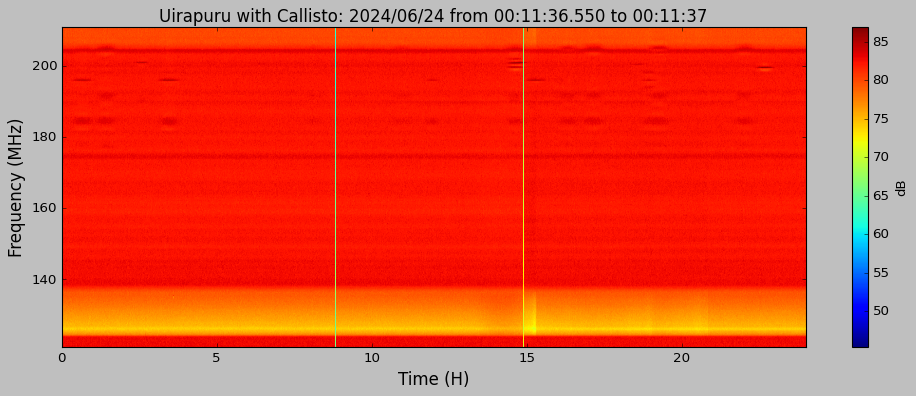

In [173]:
data0 = read_data(day[0])
dataf = read_data(day[95])
plt.figure(figsize=(15,5))
plt.imshow(Y_ssdB,aspect='auto', extent=[0,172800/7200,data[3].min(),data[3].max()])
plt.title('Uirapuru with Callisto: {} from {} to {}'.format(data0[1]['DATE-OBS'], data0[1]['TIME-OBS'], dataf[1]['TIME-END']),fontsize=15)
plt.xlabel('Time (H)',fontsize=15)
plt.ylabel('Frequency (MHz)',fontsize=15)
plt.colorbar(label='dB');

In [172]:
a = Y_ssW[200,:]
#a.shape
data[2].shape
#plt.plot(Y_ssW[200,:], data[2])

(172800,)